# MNIST - Categorical Classification
> # L2 Regularization
## Import Tensorflow & Keras

* TensorFlow Version 지정

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'1.15.0'

* GPU 설정 확인

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

* Keras Version 확인

In [3]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

# I. MNIST Data_Set Load

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

* Normalization

In [0]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255

> ## 2) One Hot Encoding

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - Model Capacity는 기존과 동일
 - L2 Regularization 적용

In [8]:
from keras import models
from keras import layers
from keras import regularizers

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.001),
                       input_shape=(28 * 28,)))
mnist.add(layers.Dense(256, activation = 'relu',
                       kernel_regularizer = regularizers.l2(0.001)))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [10]:
mnist.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [11]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행

In [12]:
Hist_mnist = mnist.fit(train_images, train_labels,
                       epochs = 50,
                       batch_size = 128,
                       validation_split = 0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/50





48000/48000 [==============================] - 10s 201us/step - loss: 0.6988 - acc: 0.9121 - val_loss: 0.4097 - val_acc: 0.9468
Epoch 2/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.3160 - acc: 0.9580 - val_loss: 0.2582 - val_acc: 0.9645
Epoch 3/50
48000/48000 [==============================] - 2s 34us/step - loss: 0.2361 - acc: 0.9648 - val_loss: 0.2268 - val_acc: 0.9657
Epoch 4/50
48000/48000 [==============================] - 2s 34us/step - loss: 0.2017 - acc: 0.9696 - val_loss: 0.2094 - val_acc: 0.9664
Epoch 5/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1815 - acc: 0.9720 - val_loss: 0.1932 - val_acc: 0.9651
Epoch 6/50
48000/48000 [==============================] - 2s 33us/step - loss: 0.1669 - acc: 0.9750 - val_loss: 0.1751 - val_acc: 0.9726
Epoch 7/50
48000/48000 [

> ## 4) 학습 결과 시각화

* Loss Visualization

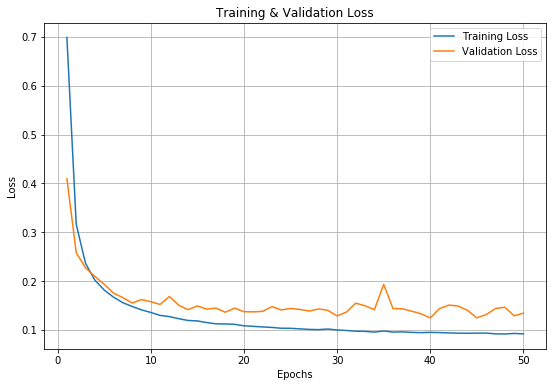

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [15]:
loss, accuracy = mnist.evaluate(test_images, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

10000/10000 [==============================] - 0s 41us/step
Loss = 0.13332
Accuracy = 0.97610


# 
# 
# 
# The End
# 
# 
# 